# Bank Churn

In [ ]:
Here, object is to build model to predict whether employee is likely to leave company or not.

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
sns.set_style("dark")
import warnings
pd.set_option('display.max_columns', 100)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_csv('chunk.csv')
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1804,6016-LVTJQ,Female,0,Yes,Yes,34,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.65,716.4,No
1831,3402-XRIUO,Female,1,Yes,No,22,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,63.55,1381.8,No
5072,5995-SNNEW,Male,1,Yes,No,23,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.45,2184.85,No


<AxesSubplot:xlabel='Churn', ylabel='count'>

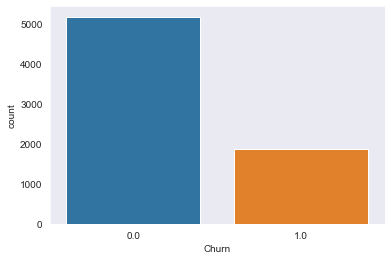

In [197]:
sns.countplot(df['Churn'])  # this is my target feature
# 0 means not leaving
# 1 means leaving
# this is example of imbalanced data set, which i will solved latter

In [3]:
df.drop('customerID',axis=1,inplace=True)  # removig customer_id, which is useless

In [4]:
df.shape

(7043, 21)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# converting total_charges columns to numeric
df['TotalCharges']=df['TotalCharges'].apply(lambda x:pd.to_numeric(x,errors='coerce'))

In [46]:
#columns with missing value
[col for col in df.columns if df[col].isna().any()]

['TotalCharges']

In [5]:
# unique elements 
for i in df.columns:
    print( f' {i} columns have {df[i].unique()} unique elements')

 gender columns have ['Female' 'Male'] unique elements
 SeniorCitizen columns have [0 1] unique elements
 Partner columns have ['Yes' 'No'] unique elements
 Dependents columns have ['No' 'Yes'] unique elements
 tenure columns have [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] unique elements
 PhoneService columns have ['No' 'Yes'] unique elements
 MultipleLines columns have ['No phone service' 'No' 'Yes'] unique elements
 InternetService columns have ['DSL' 'Fiber optic' 'No'] unique elements
 OnlineSecurity columns have ['No' 'Yes' 'No internet service'] unique elements
 OnlineBackup columns have ['Yes' 'No' 'No internet service'] unique elements
 DeviceProtection columns have ['No' 'Yes' 'No internet service'] unique elements
 TechSupport columns have ['No' 'Yes' 'No internet service'] unique elements
 Stream

In [77]:
# removing space 
for i in cat_col:
    df[i]=df[i].apply(lambda x:x.strip())

In [8]:
df.replace({'No phone service':'No','No internet service':'No'},inplace=True)  # replacing some string

In [9]:
# unique elements 
for i in df.columns:
    print( f' {i} columns have {df[i].unique()} unique elements')

 gender columns have ['Female' 'Male'] unique elements
 SeniorCitizen columns have [0 1] unique elements
 Partner columns have ['Yes' 'No'] unique elements
 Dependents columns have ['No' 'Yes'] unique elements
 tenure columns have [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] unique elements
 PhoneService columns have ['No' 'Yes'] unique elements
 MultipleLines columns have ['No' 'Yes'] unique elements
 InternetService columns have ['DSL' 'Fiber optic' 'No'] unique elements
 OnlineSecurity columns have ['No' 'Yes'] unique elements
 OnlineBackup columns have ['Yes' 'No'] unique elements
 DeviceProtection columns have ['No' 'Yes'] unique elements
 TechSupport columns have ['No' 'Yes'] unique elements
 StreamingTV columns have ['No' 'Yes'] unique elements
 StreamingMovies columns have ['No' 'Yes'] unique elements


In [81]:
df.replace({'Female':0,'Male':1,'Yes':1,'No':0},inplace=True)

In [6]:
#categoricals columns
cat_col=[col for col in df.columns if df[col].dtype=='O']
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [10]:
#continuous columns(numeric columns)
num_col=[col for col in df.columns if df[col].dtype!='O']
num_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

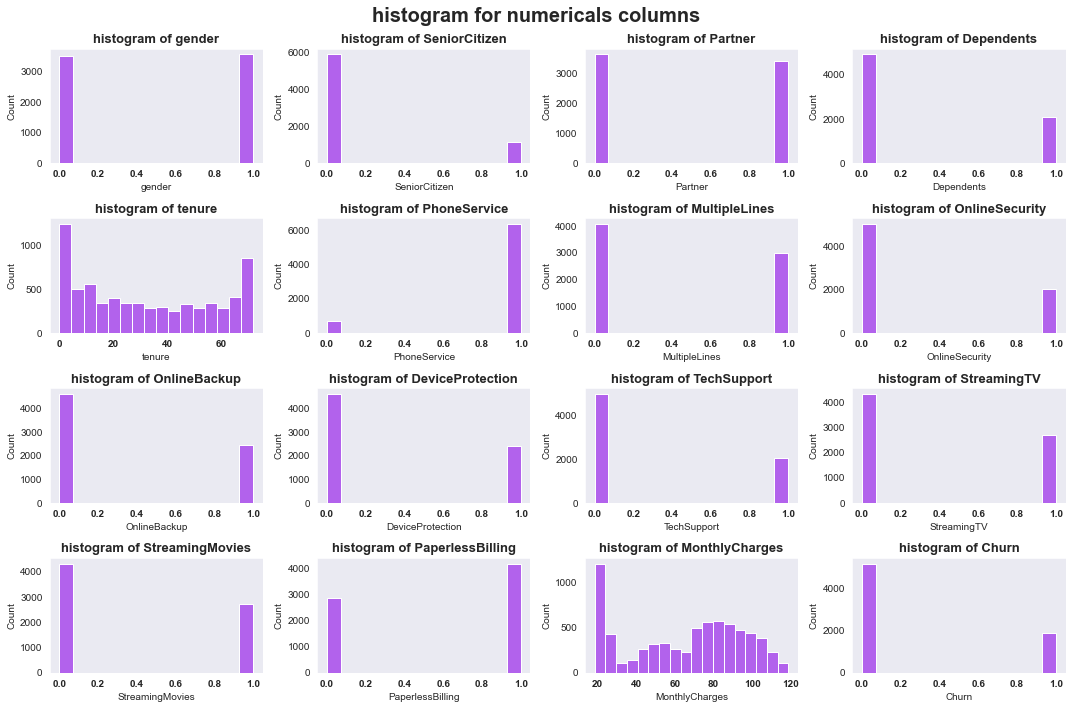

In [94]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_col):
  plt.suptitle('histogram for numericals columns',fontweight='bold',fontsize=20)
  plt.subplot(4,4,i+1)
  plt.xticks(fontweight='bold')
  plt.xticks(fontweight='bold')
  sns.histplot(df[col],color='#A035EA',kde_kws={'linewidth':2,'color':'green'})
  plt.title(f'histogram of {col}',fontweight='bold',fontsize=13)
  plt.tight_layout()

In [11]:
df1=df.copy()

In [13]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(drop='first')

In [198]:
df_dmmies=pd.get_dummies(df[cat_col],drop_first=True)


In [30]:
df[num_col]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [33]:
df_final=pd.concat([df[num_col],df_dmmies],axis=1)
df_final

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,1,1,1,1,1,0,0,1,1,0,1,1,1,0,1,1,0,0,0
7040,0,11,29.60,346.45,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [45]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=10)

In [46]:
 ##reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object
for i in cat_col:
    df[i]=ohe.fit_transform(df[i].values.reshape(-1,1)).toarray()

In [51]:
df_final['TotalCharges']=knn.fit_transform(df_final['TotalCharges'].values.reshape(-1,1))

In [56]:
df_final.sample(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
6340,-0.439916,-0.381597,1.068147,-0.087357,1,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,0,0,0
3037,-0.439916,-0.015113,-1.476064,-0.695767,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
6500,-0.439916,-0.463037,-0.985834,-0.667995,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0


In [54]:
 from sklearn.preprocessing import StandardScaler   # changing scale
df_final[num_col]=StandardScaler().fit_transform(df_final[num_col])

In [58]:
df_final.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [62]:
df_final.Churn_Yes.value_counts()  # target is imbalanced

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [64]:
X=df_final.drop('Churn_Yes',axis=1)
y=df_final.Churn_Yes

# Handling Imbalance DataSet

In [66]:
from imblearn.over_sampling import SMOTE

In [70]:
smote=SMOTE(sampling_strategy='minority',random_state=0,k_neighbors=10)

In [75]:
X_sm,y_sm=smote.fit_resample(X, y)

In [79]:
y_sm.value_counts()  # data arae now balanced

0    5174
1    5174
Name: Churn_Yes, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=42,stratify=y_sm)

# Model building

In [169]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[23]),
    
    layers.Dense(64, activation='relu'), 
    
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [170]:
history=model.fit(X_train,y_train,epochs=100,batch_size=128,verbose=0,validation_data=(X_test, y_test),)

Minimum validation loss: 0.3938370645046234


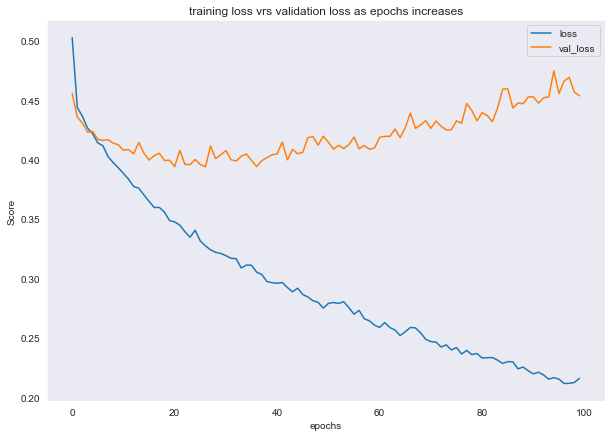

In [179]:
history_df = pd.DataFrame(history.history)

history_df.loc[:, ['loss', 'val_loss']].plot(figsize=(10,7),xlabel='epochs',ylabel='Score',
                                            title='training loss vrs validation loss as epochs increases')
print("Minimum validation loss: {}".format(history_df['val_loss'].min()));

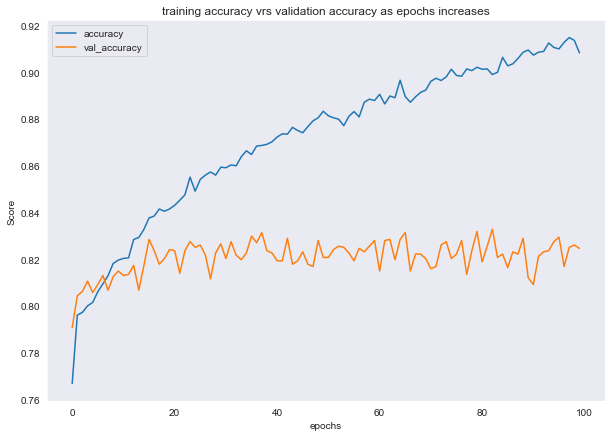

In [180]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(figsize=(10,7),xlabel='epochs',ylabel='Score',
                                                    title='training accuracy vrs validation accuracy as epochs increases');


Above two graphs clearly shows that we are **over fitting** , which need to be addressed, this can be minised in two ways according NG Andrew.
-  Adding Early Stopping
- Dropout and Batch Normalization


# Dropout and Batch Normalization

In [184]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[23]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(64, activation='relu'), 
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(1, activation='sigmoid'),
    
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [185]:
history=model.fit(X_train,y_train,epochs=100,batch_size=128,verbose=0,validation_data=(X_test, y_test))

Minimum validation loss: 0.383306086063385


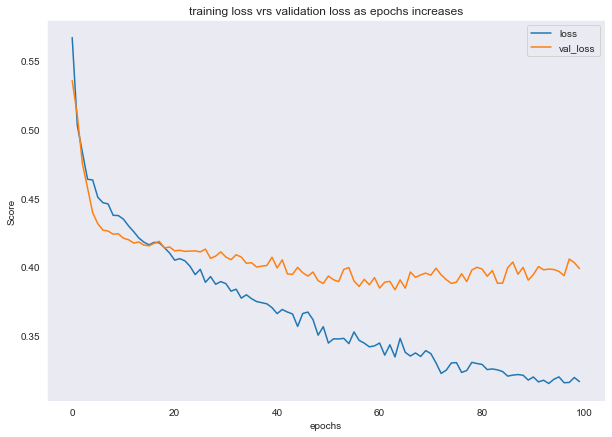

In [186]:
history_df = pd.DataFrame(history.history)

history_df.loc[:, ['loss', 'val_loss']].plot(figsize=(10,7),xlabel='epochs',ylabel='Score',
                                            title='training loss vrs validation loss as epochs increases')
print("Minimum validation loss: {}".format(history_df['val_loss'].min()));

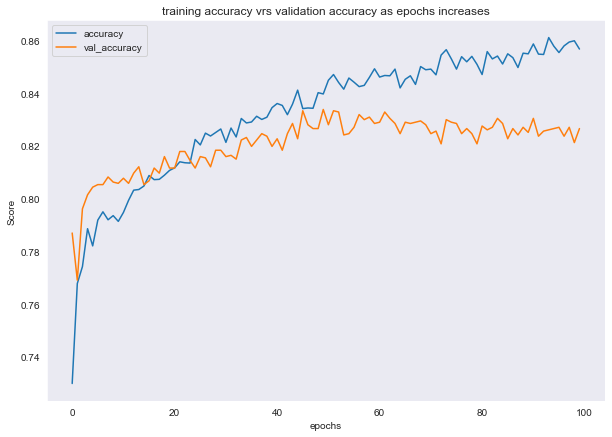

In [187]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(figsize=(10,7),xlabel='epochs',ylabel='Score',
                                                    title='training accuracy vrs validation accuracy as epochs increases');


Above graph clearly shows that some extent we have reduced over fitting

# Adding Early Stopping

In [189]:
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    """"""
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[23]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(64, activation='relu'), 
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(1, activation='sigmoid'),
    
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [190]:
history=model.fit(X_train,y_train,epochs=100,batch_size=128,verbose=0,validation_data=(X_test, y_test),
                  callbacks=[early_stopping],)

Minimum validation loss: 0.37658360600471497


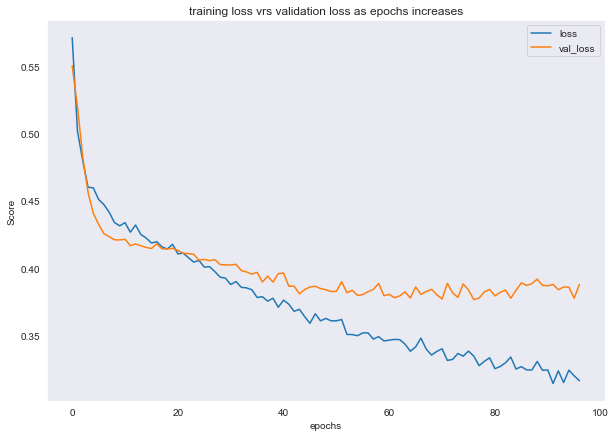

In [191]:
history_df = pd.DataFrame(history.history)

history_df.loc[:, ['loss', 'val_loss']].plot(figsize=(10,7),xlabel='epochs',ylabel='Score',
                                            title='training loss vrs validation loss as epochs increases')
print("Minimum validation loss: {}".format(history_df['val_loss'].min()));

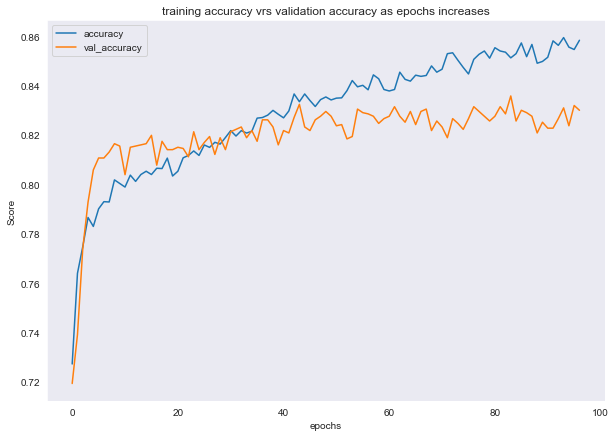

In [192]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(figsize=(10,7),xlabel='epochs',ylabel='Score',
                                                    title='training accuracy vrs validation accuracy as epochs increases');

We, can see that this approch yeilds better score that dropout and batchnormalistion

In [115]:
history?

In [193]:
model.evaluate(X_test,y_test)

65/65 [==============================] - 0s 1ms/step - loss: 0.3766 - accuracy: 0.8314


[0.3765835762023926, 0.831400990486145]

In [194]:
yp=np.round(model.predict(X_test))
yp[:5]

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [93]:
y_test[:5]

4152     0
10283    1
8318     1
5721     0
2860     0
Name: Churn_Yes, dtype: uint8

In [195]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1035
           1       0.82      0.86      0.84      1035

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



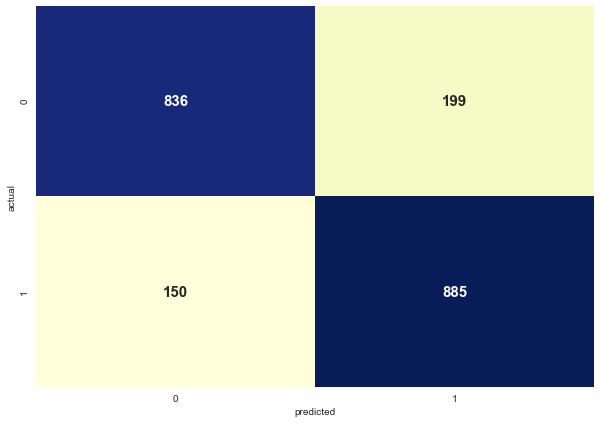

In [196]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,yp),annot=True,fmt='d',cmap="YlGnBu",cbar=False,annot_kws={'fontweight':'bold','size':15})
plt.xlabel('predicted')
plt.ylabel('actual');

# Keras tunner

It is done to find best number of neurons(unit) and hidden layers for the model

In [159]:

from keras_tuner import RandomSearch

In [157]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    for i in range(hp.Int("num_layers", 2, 20)): # for hidden layer between 2 to 19
        model.add(
            layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),  # no. of neuron
                activation="relu",
            )
        )
    model.add(layers.Dense(1, activation="sigmoid"))  #output layer
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [164]:
tuner =RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=3,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [162]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=42,stratify=y_sm)

In [166]:
tuner.search(X_train,y_train,epochs=10,validation_data=(X_test, y_test))

Trial 5 Complete [00h 02m 10s]
val_accuracy: 0.5787439544995626

Best val_accuracy So Far: 0.8210950096448263
Total elapsed time: 00h 05m 37s
INFO:tensorflow:Oracle triggered exit


In [168]:
tuner.results_summary()  # so we can select hypermaters which give high accuracy

Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 10
units_0: 448
units_1: 256
learning_rate: 0.001
units_2: 320
units_3: 480
units_4: 96
units_5: 128
units_6: 224
units_7: 256
units_8: 448
units_9: 384
units_10: 192
units_11: 96
units_12: 160
units_13: 480
units_14: 480
units_15: 352
units_16: 64
Score: 0.8210950096448263
Trial summary
Hyperparameters:
num_layers: 5
units_0: 32
units_1: 160
learning_rate: 0.001
units_2: 32
units_3: 416
units_4: 256
units_5: 480
units_6: 384
units_7: 384
units_8: 256
units_9: 448
units_10: 320
units_11: 512
units_12: 64
units_13: 224
units_14: 320
units_15: 160
units_16: 128
Score: 0.8162640929222107
Trial summary
Hyperparameters:
num_layers: 17
units_0: 416
units_1: 480
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: